# Linear Regression Practice

These are practice exercises from codebasic YouTube series on machine leaening. 
Channel link - https://www.youtube.com/@codebasics 
Github link - https://github.com/codebasics 


## One Variable

Per capita income in USD prediction

In [2]:
# import relavatnt packages
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read the data
canada_percapita = pd.read_csv('canada_per_capita_income.csv')

canada_percapita.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'Per Capita Income (US$)')

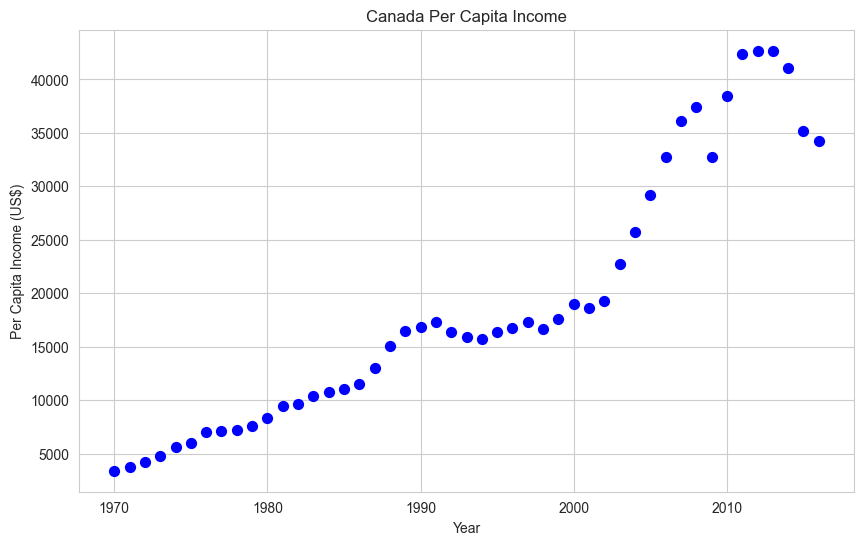

In [5]:
# plot the data
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(canada_percapita['year'], canada_percapita['per capita income (US$)'], color='blue', s=50)
plt.title('Canada Per Capita Income')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')

In [6]:
# Build a linear model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
# split the data into X and y
X = canada_percapita[['year']]
y = canada_percapita['per capita income (US$)']

In [9]:
# create a linear regression object
lm = LinearRegression()

# fit thr model

lm.fit(X, y)

LinearRegression()

In [12]:
# print the coefficients
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.loc['Intercept'] = lm.intercept_

coeff_df

,Coefficient
year,8.284651e+02
Intercept,-1.632211e+06


In [24]:
# write the linear regression equation we shall do this in 2 dps
b0 = round(lm.intercept_, 2)
b1 = round(lm.coef_[0], 2)

print(f"y (Canada per capita income) = {b0} + {b1} * year")

y (Canada per capita income) = -1632210.76 + 828.47 * year


In [16]:
canada_percapita.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [18]:
# predict the nre income for next 5 years i.e. 2017, 2018, 2018,and 2020
canada_percapita_15_20 = pd.DataFrame({'year': [2015, 2016, 2017, 2018, 2019, 2020]})
canada_percapita_15_20['predicted_income'] = lm.predict(canada_percapita_15_20[['year']])
canada_percapita_15_20


,year,predicted_income
0,2015,37146.368718
1,2016,37974.833794
2,2017,38803.298869
3,2018,39631.763944
4,2019,40460.229019
5,2020,41288.694094


### Conclusion 

Canada's adjusted per capitaincome can be predicted using the equation 

y (Canada per capita income) = -1632210.76 + 828.47 * year

## Multivariate

In this exercise, we explored fitting a linear model with several variables. The goal is to predict the expected salary based on experience, test score and interview score.

In [68]:
# import hiring data
hiring = pd.read_csv('hiring.csv')
hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


### Data cleaning and exploration

From the first five observations, we see that the data has different data types aand missing data

In [69]:
# check the data types of the columns
hiring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [70]:
hiring.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

For missing data we shall replace all missing data with the median for each column, but first we need to ensure that the column on experience is numeric in nature.

In [71]:
hiring.groupby('experience').size()

experience
eleven    1
five      1
seven     1
ten       1
three     1
two       1
dtype: int64

In [72]:
# replace the values in the experience column with numbers instead of the text
hiring['experience'] = hiring['experience'].replace({'eleven':11, 'ten':10 ,'seven':7,'five': 5, 'four': 4, 'three': 3, 'two': 2, 'one': 1, 'zero': 0})

hiring.head()

C:\Users\ileboo\AppData\Local\Temp\ipykernel_31004\869911258.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hiring['experience'] = hiring['experience'].replace({'eleven':11, 'ten':10 ,'seven':7,'five': 5, 'four': 4, 'three': 3, 'two': 2, 'one': 1, 'zero': 0})


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000


Since the method will soon be depreceated, let us reimport the data and use the word2number package to convert the text to numbers. This will be more faster will ensure in a situation where we have a large dataset we need to to tire.

In [89]:
hiring = pd.read_csv('hiring.csv')

from word2number import w2n

hiring['experience'] = hiring['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)
hiring


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [73]:
hiring.groupby('experience').size()

experience
2.0     1
3.0     1
5.0     1
7.0     1
10.0    1
11.0    1
dtype: int64

In [74]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [76]:
# for each missing column replace with the median of the column
median_test_score = hiring['test_score(out of 10)'].median()
median_exp = hiring['experience'].median()

In [80]:
# for each missing column replace with the median of the column
hiring['test_score(out of 10)'] = hiring['test_score(out of 10)'].fillna(median_test_score)

hiring['experience'] = hiring['experience'].fillna(median_test_score)

In [81]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,8.0,8.0,9,50000
1,8.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [82]:
hiring.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [83]:
hiring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      float64
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 388.0 bytes


In [84]:
# build the linea model
multi_lm = LinearRegression()

X= hiring[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]

y = hiring['salary($)']

# fit the model

multi_lm.fit(X, y)

# print the coefficients

coeff_df = pd.DataFrame(multi_lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.loc['Intercept'] = multi_lm.intercept_

coeff_df

,Coefficient
experience,1446.408327
test_score(out of 10),620.632794
interview_score(out of 10),1755.024219
Intercept,34528.444811


What is the expected salary for the candidates below
- 2yr experience, 9 test score, 6 interview score
- 12 yr experience, 10 test score, 10 interview score

In [92]:
# let us create a data the info above using the same format as the hiring data

hiring_new = pd.DataFrame(
    {'experience': [2, 12],
     'test_score(out of 10)': [9, 10],
     'interview_score(out of 10)': [6, 10]
     }
)
    
# predict the salary for the new data
hiring_new['salary($)'] = multi_lm.predict(hiring_new[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']])
hiring_new

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,9,6,53537.101927
1,12,10,10,75641.914872
